<a href="https://colab.research.google.com/github/nikilstark/TerraBlue-XT/blob/master/Time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('/content/drive/My Drive/Timeseries/train_csv.csv',squeeze=True)
df.head()

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70


In [0]:
df.tail()

,id,time,feature
75,75,2019-03-19 00:12:30,469.72
76,76,2019-03-19 00:12:40,406.79
77,77,2019-03-19 00:12:50,128.91
78,78,2019-03-19 00:13:00,85.28
79,79,2019-03-19 00:13:10,121.12


In [0]:
df['time'] =pd.to_datetime(df['time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   id       80 non-null     int64         
 1   time     80 non-null     datetime64[ns]
 2   feature  80 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.0 KB


In [0]:
ts_df = df.drop(['id'],axis=1)
ts_df.head()

,time,feature
0,2019-03-19 00:00:00,237.97
1,2019-03-19 00:00:10,57.93
2,2019-03-19 00:00:20,90.53
3,2019-03-19 00:00:30,260.75
4,2019-03-19 00:00:40,49.70


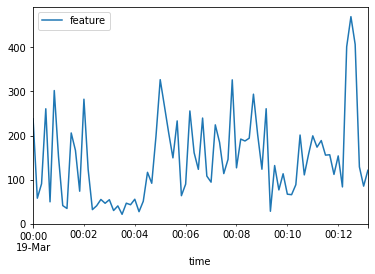

In [0]:
ts_df.set_index('time',inplace=True)
ts_df.plot()

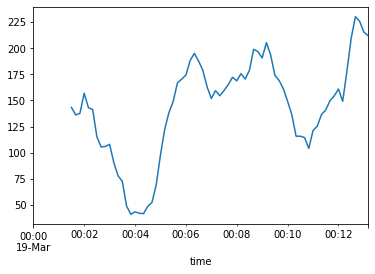

In [0]:
ts_df_mean = ts_df['feature'].rolling(window=10).mean()
ts_df_mean.plot()

### Augmented Dickey-Fuller test

In [0]:
from statsmodels.tsa.stattools import adfuller

In [0]:
# H0: failed to reject null hypothesis(Not stationary)
# H1: Accepting alternate hypothesis(Stationary)

def adfuller_test(column):
  results = adfuller(column)
  labels= ['ADF test stats','p-value','lags used','no of obs used','critical','AIC']
  for value,label in zip(results,labels):
    print(label+':'+str(value))
  for key, value in results[4].items():
	  print('\t%s: %.3f' % (key, value))
  if results[1] <= 0.05:
      print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
  else:
      print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [0]:
adfuller_test(ts_df['feature'])

ADF test stats:-5.945866499650216
p-value:2.205049473411699e-07
lags used:0
no of obs used:79
critical:{'1%': -3.5159766913976376, '5%': -2.898885703483903, '10%': -2.5866935058484217}
AIC:786.8263144737514
	1%: -3.516
	5%: -2.899
	10%: -2.587
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


### Data is stationary. No need for lags

# Auto Regressive model

In [0]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

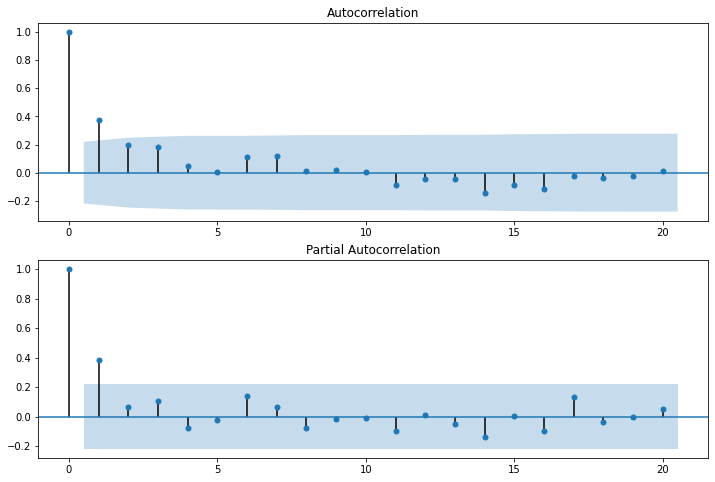

In [0]:
# plot_acf,plot_Pacf

fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(211)
fig = plot_acf(ts_df['feature'],ax=ax1,lags=20)
ax2 = fig.add_subplot(212)
fig = plot_pacf(ts_df['feature'],ax= ax2,lags=20)

In [0]:
from statsmodels.tsa.arima_model import ARIMA

In [0]:
# p =0(or)1,d=0,q=10

model= ARIMA(ts_df['feature'],order=(0,0,10))
model= model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


In [0]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                feature   No. Observations:                   80
Model:                    ARMA(0, 10)   Log Likelihood                -467.285
Method:                       css-mle   S.D. of innovations             78.106
Date:                Fri, 12 Jun 2020   AIC                            958.570
Time:                        08:00:58   BIC                            987.154
Sample:                    03-19-2019   HQIC                           970.030
                         - 03-19-2019                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            156.4490     30.427      5.142      0.000      96.813     216.085
ma.L1.feature      0.2428      0.136      1.789      0.078      -0.023       0.509
ma.L2.feature      0.2458      0.141      1.749      0.085      -0.030       0.521
ma.L3.feature      0.3370      0.123      2.745      0.008       0.096       0.578
ma.L4.feature      0.0699      0.116      0.605      0.547      -0.157       0.297
ma.L5.feature     -0.0798      0.113     -0.705      0.483      -0.302       0.142
ma.L6.feature      0.2078      0.132      1.569      0.121      -0.052       0.467
ma.L7.feature      0.5824      0.155      3.750      0.000       0.278       0.887
ma.L8.feature      0.5134      0.160      3.214      0.002       0.200       0.827
ma.L9.feature      0.3722      0.158      2.361      0.021       0.063       0.681
ma.L10.feature     0.1644      0.150      1.094      0.278      -0.130       0.459
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
MA.1             0.8989           -0.4381j            1.0000           -0.0722
MA.2             0.8989           +0.4381j            1.0000            0.0722
MA.3             0.3100           -0.9508j            1.0000           -0.1998
MA.4             0.3100           +0.9508j            1.0000            0.1998
MA.5            -0.1370           -1.4361j            1.4426           -0.2651
MA.6            -0.1370           +1.4361j            1.4426            0.2651
MA.7            -0.8482           -0.9024j            1.2384           -0.3701
MA.8            -0.8482           +0.9024j            1.2384            0.3701
MA.9            -1.3556           -0.2603j            1.3804           -0.4698
MA.10           -1.3556           +0.2603j            1.3804            0.4698
------------------------------------------------------------------------------
"""

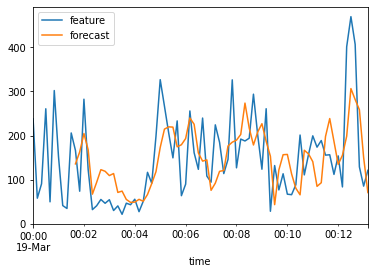

In [0]:
ts_df['forecast'] = model.predict(start=10,end=80)
ts_df[['feature','forecast']].plot()

In [0]:
from sklearn.metrics import mean_squared_error
mse_arima = mean_squared_error(ts_df['forecast'].dropna(),ts_df.iloc[10:81,0])
np.sqrt(mse_arima)

77.55736547622482

## Normalising the data

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
ts_df= ts_df.drop(['forecast'],axis=1)

In [0]:
ts_df.head()

,feature
time,
2019-03-19 00:00:00,237.97
2019-03-19 00:00:10,57.93
2019-03-19 00:00:20,90.53
2019-03-19 00:00:30,260.75
2019-03-19 00:00:40,49.70


In [0]:
norm_scaler = MinMaxScaler()
ts_df_norm= pd.DataFrame(norm_scaler.fit_transform(ts_df))
ts_df_norm.head()

,0
0,0.483116
1,0.081564
2,0.154273
3,0.533924
4,0.063208


In [0]:
ts_df_norm.columns =['feature']
ts_df_norm.head()

,feature
0,0.483116
1,0.081564
2,0.154273
3,0.533924
4,0.063208


In [0]:
norm_model =ARIMA(ts_df_norm,order=(0,0,10))
norm_model = norm_model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [0]:
norm_model.predict(start=10,end=80).shape

(71,)

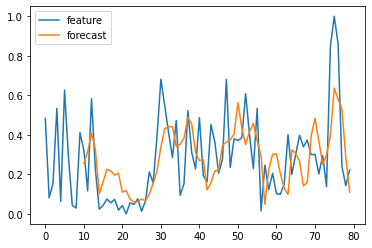

In [0]:
ts_df_norm['forecast'] = norm_model.predict(start=10,end=80)
ts_df_norm[['feature','forecast']].plot()

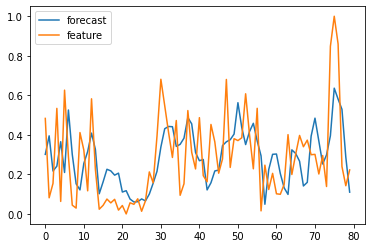

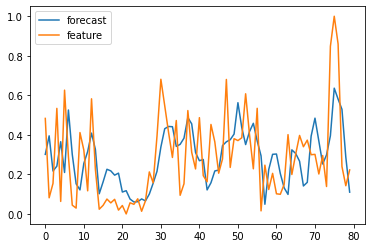

In [0]:
norm_model.plot_predict()

In [0]:
mse_norm = mean_squared_error(ts_df_norm['forecast'].dropna(),ts_df_norm.iloc[10:81,0])
np.sqrt(mse_norm)

0.17298069827704315

In [0]:
ts_df_norm

,feature,forecast
0,0.483116,NaN
1,0.081564,NaN
2,0.154273,NaN
3,0.533924,NaN
4,0.063208,NaN
...,...,...
75,1.000000,0.636089
76,0.859644,0.580647
77,0.239874,0.529197
78,0.142564,0.287416


# Standardization of Data

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
stand_scaler = StandardScaler()
ts_df_stand = pd.DataFrame(stand_scaler.fit_transform(ts_df))
ts_df_stand.head()

,0
0,0.940092
1,-0.930665
2,-0.591926
3,1.176795
4,-1.016182


In [0]:
ts_df_stand.columns =['feature']
ts_df_stand.head()

,feature
0,0.940092
1,-0.930665
2,-0.591926
3,1.176795
4,-1.016182


In [0]:
stand_model =ARIMA(ts_df_stand,order=(0,0,10))
stand_model = stand_model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


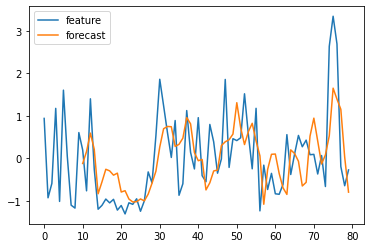

In [0]:
ts_df_stand['forecast'] = stand_model.predict(start=10,end=80)
ts_df_stand[['feature','forecast']].plot()

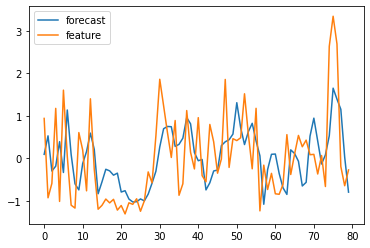

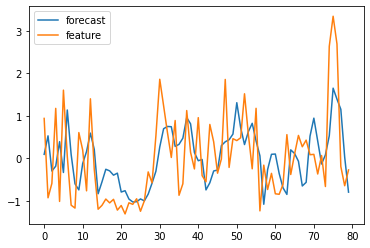

In [0]:
stand_model.plot_predict()

In [0]:
mse_stand = mean_squared_error(ts_df_stand['forecast'].dropna(),ts_df_stand.iloc[10:81,0])
np.sqrt(mse_stand)

0.8058813433371785

# Prediction for test data

In [0]:
test = pd.read_csv('/content/drive/My Drive/Timeseries/test_csv.csv')
test.shape

(40, 2)

In [0]:
predictions=norm_model.predict(start=80,end=119,dynamic=True,exog=None)

In [0]:
predictions = pd.DataFrame(norm_scaler.inverse_transform((np.array(predictions)).reshape(-1,1)))
predictions.shape

(40, 1)

In [0]:
test['feature'] = predictions
test.head()

,id,time,feature
0,80,2019-03-19 00:13:20,73.545107
1,81,2019-03-19 00:13:30,237.849642
2,82,2019-03-19 00:13:40,380.755372
3,83,2019-03-19 00:13:50,358.469505
4,84,2019-03-19 00:14:00,221.672639


In [0]:
test.to_csv(path_or_buf='/content/drive/My Drive/test_predictions.csv')

In [0]:
train= pd.read_csv('/content/drive/My Drive/Timeseries/train_csv.csv')

In [0]:
data = pd.concat([train,test],ignore_index=True)
data.tail()

,id,time,feature
115,115,2019-03-19 00:19:10,156.449054
116,116,2019-03-19 00:19:20,156.449054
117,117,2019-03-19 00:19:30,156.449054
118,118,2019-03-19 00:19:40,156.449054
119,119,2019-03-19 00:19:50,156.449054


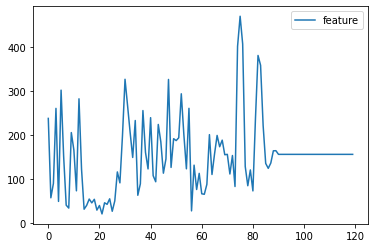

In [0]:
data[['time','feature']].plot()

In [0]:
print('RMSE of Arima model             : %.4f'% (np.sqrt(mse_arima)))
print('RMSE of Normalised data Arima model  : %.4f'% (np.sqrt(mse_norm)))
print('RMSE of Standardized data Arima model: %.4f'% (np.sqrt(mse_stand)))

RMSE of Arima model             : 77.5574
RMSE of Normalised data Arima model  : 0.1730
RMSE of Standardized data Arima model: 0.8059


#Best RMSE i got with ARIMA model by Normalised Dataset



# LSTM

In [0]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

Using TensorFlow backend.


In [0]:
data_set = pd.read_csv('/content/drive/My Drive/Timeseries/train_csv.csv',squeeze=True)
data_set.head()

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70


In [0]:
data = data_set.filter(['feature'])
data = data.values
data[:5]

array([[237.97],
       [ 57.93],
       [ 90.53],
       [260.75],
       [ 49.7 ]])

In [0]:
# Normalization
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
scaled_data[:5]

array([[0.48311625],
       [0.08156392],
       [0.15427335],
       [0.53392363],
       [0.06320814]])

In [0]:
train_data = scaled_data[0:64,:]
x_train =[]
y_train=[]

for i in range(20,len(train_data)):
  x_train.append(train_data[i-20:i,0])
  y_train.append(train_data[i,0])

print(x_train[0:5])
print(y_train[:5])

[array([0.48311625, 0.08156392, 0.15427335, 0.53392363, 0.06320814,
       0.62610402, 0.29193059, 0.04422785, 0.02955215, 0.41152199,
       0.32311089, 0.11684807, 0.58234454, 0.22604603, 0.02382014,
       0.04320189, 0.07516282, 0.05584798, 0.07382461, 0.01920332]), array([0.08156392, 0.15427335, 0.53392363, 0.06320814, 0.62610402,
       0.29193059, 0.04422785, 0.02955215, 0.41152199, 0.32311089,
       0.11684807, 0.58234454, 0.22604603, 0.02382014, 0.04320189,
       0.07516282, 0.05584798, 0.07382461, 0.01920332, 0.04253279]), array([0.15427335, 0.53392363, 0.06320814, 0.62610402, 0.29193059,
       0.04422785, 0.02955215, 0.41152199, 0.32311089, 0.11684807,
       0.58234454, 0.22604603, 0.02382014, 0.04320189, 0.07516282,
       0.05584798, 0.07382461, 0.01920332, 0.04253279, 0.        ]), array([0.53392363, 0.06320814, 0.62610402, 0.29193059, 0.04422785,
       0.02955215, 0.41152199, 0.32311089, 0.11684807, 0.58234454,
       0.22604603, 0.02382014, 0.04320189, 0.07516282, 

In [0]:
# converting to numpy array
x_train,y_train = np.array(x_train),np.array(y_train)

In [0]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(44, 20, 1)

In [0]:
model = Sequential()
model.add(LSTM(1,input_shape=(x_train.shape[1],1)))
model.add(Dense(1))

In [0]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [0]:
model.fit(x_train,y_train,batch_size=1,epochs=10)

Epoch 1/10
44/44 [==============================] - 1s 18ms/step - loss: 0.1208
Epoch 2/10
44/44 [==============================] - 0s 6ms/step - loss: 0.0821
Epoch 3/10
44/44 [==============================] - 0s 6ms/step - loss: 0.0615
Epoch 4/10
44/44 [==============================] - 0s 6ms/step - loss: 0.0481
Epoch 5/10
44/44 [==============================] - 0s 6ms/step - loss: 0.0405
Epoch 6/10
44/44 [==============================] - 0s 6ms/step - loss: 0.0375
Epoch 7/10
44/44 [==============================] - 0s 6ms/step - loss: 0.0358
Epoch 8/10
44/44 [==============================] - 0s 6ms/step - loss: 0.0355
Epoch 9/10
44/44 [==============================] - 0s 6ms/step - loss: 0.0351
Epoch 10/10
44/44 [==============================] - 0s 6ms/step - loss: 0.0349


In [0]:
test_data= scaled_data[64-20:,:]

x_test=[]
y_test=[]
y_test = data[64:,:]
for i in range(20,len(test_data)):
  x_test.append(test_data[i-20:i,0])
x_test = np.array(x_test)

In [0]:
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(16, 20, 1)

In [0]:
predictions= model.predict(x_test)
prediction= scaler.inverse_transform(predictions)
prediction

array([[143.63058],
       [143.29965],
       [143.38457],
       [143.30516],
       [143.11516],
       [143.04292],
       [142.92567],
       [142.94725],
       [142.93547],
       [143.11044],
       [143.05   ],
       [143.33046],
       [142.3941 ],
       [141.42064],
       [140.9958 ],
       [141.52434]], dtype=float32)

In [0]:
rmse = np.sqrt(mean_squared_error(prediction,y_test))
rmse

127.29424574587307